In [1]:
from PIL import Image
import numpy as np

##### chair의 이미지 해상도를 통일하여 적용하기 : Test

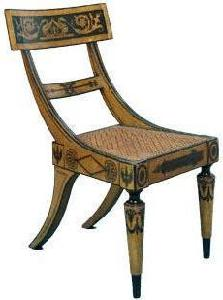

In [2]:
# chair의 1번 이미지
img = Image.open("../Data/chair/image_0001.jpg")
img

In [3]:
# 배열 확인
np.array(img).shape

(300, 223, 3)

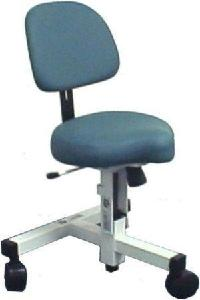

In [4]:
# chair의 2번 이미지
img = Image.open("../Data/chair/image_0002.jpg")
img

In [5]:
# 배열 확인
np.array(img).shape

(300, 200, 3)

> Image의 해상도가 일정하지 않음    
전체 이미지의 해상도의 최대값을 가지고 적용해보자!

##### chair의 전체이미지의 평균 해상도 구하기

In [6]:
import glob

In [7]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/chair/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [8]:
print('chair의 너비 최대 해상도 :', np.mean(widthRatio))
print('chair의 높이 최대 해상도 :', np.mean(heightRatio))

chair의 너비 최대 해상도 : 229.65
chair의 높이 최대 해상도 : 297.31666666666666


> 너비 : 230, 높이 : 298으로 정함!

---
##### chair 이미지 해상도 변경 및 Gray Scale로 적용

In [9]:
i = 1
for file in sorted(glob.glob("../Data/chair/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((230, 298), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L')
    imgResize.save("../Data/chairNew/image_%04d.jpg"%i, "JPEG")
    i += 1

##### Laptop의 이미지 해상도 변경 및 GrayScale 적용

In [10]:
i = 1
for file in sorted(glob.glob("../Data/laptop/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((230, 298), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L')
    imgResize.save("../Data/laptopNew/image_%04d.jpg"%i, "JPEG")
    i += 1

#### chair Image를 Numpy로 변경하기

In [11]:
number_of_data = 60
img_width_size = 230
img_height_size = 298

In [12]:
chairData = np.zeros(
    number_of_data * img_width_size * img_height_size,
    dtype=np.int32
).reshape(
    number_of_data,
    img_height_size,
    img_width_size
)

In [13]:
i = 0
for file in sorted(glob.glob("../Data/chairNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i,:,:] = img
    i+=1

In [14]:
chairData.shape

(60, 298, 230)

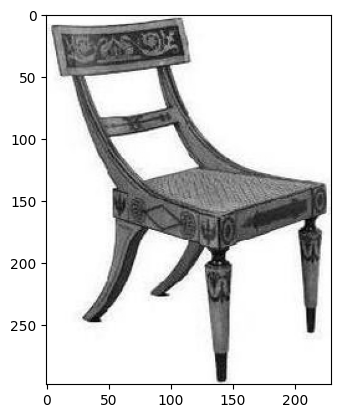

In [15]:
# 이미지 확인하기
import matplotlib.pyplot as plt

plt.imshow(chairData[0].reshape(298, 230), cmap='gray')
plt.show()

##### laptop Image를 numpy로 변경하기

In [16]:
laptopData = np.zeros(
    number_of_data * img_width_size * img_height_size,
    dtype=np.int32
).reshape(
    number_of_data,
    img_height_size,
    img_width_size
)

In [17]:
i = 0
for file in sorted(glob.glob("../Data/laptopNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    laptopData[i,:,:] = img
    i+=1

In [18]:
laptopData.shape

(60, 298, 230)

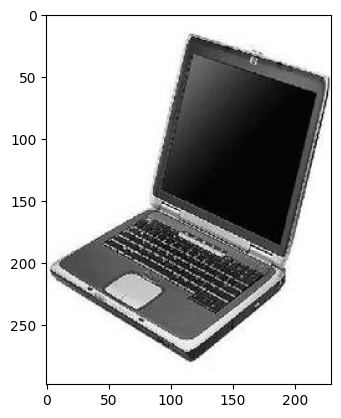

In [19]:
# 이미지 확인하기
plt.imshow(laptopData[0].reshape(298, 230), cmap='gray')
plt.show()

----
#### numpy data를 train data로 합치기

In [20]:
train = np.concatenate(
    [chairData, laptopData]
)
train.shape

(120, 298, 230)

#### target data

In [21]:
target = np.concatenate(
    [np.zeros(60), np.ones(60)]
)
target.shape

(120,)

In [22]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])